# Financial Data Analysis

In [49]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [50]:
#read in data
gool = pd.read_csv('GOOL.csv', index_col=0)
appl = pd.read_csv('APPL.csv', index_col=0)
gool.dtype = np.float64
appl.dtype = np.float64
gool.head(3)

Open        High         Low       Close   Volume  \
Date                                                                  
2016-07-22  741.859985  743.239990  736.559998  742.739990  1256300   
2016-07-21  740.359985  741.690002  735.830994  738.630005   969100   
2016-07-20  737.330017  742.130005  737.099976  741.190002  1289700   

             Adj Close  
Date                    
2016-07-22  742.739990  
2016-07-21  738.630005  
2016-07-20  741.190002

In [51]:
#reverse the data upside down
gool = gool[::-1]
appl = appl[::-1]
gool.tail(3)

Open        High         Low       Close   Volume  \
Date                                                                  
2016-07-20  737.330017  742.130005  737.099976  741.190002  1289700   
2016-07-21  740.359985  741.690002  735.830994  738.630005   969100   
2016-07-22  741.859985  743.239990  736.559998  742.739990  1256300   

             Adj Close  
Date                    
2016-07-20  741.190002  
2016-07-21  738.630005  
2016-07-22  742.739990

In [62]:
#pearson correlation between (Open-Close) of APPL and GOOL
gooldiff = gool.Open - gool.Close
gooldiff.corr(appl.Open - appl.Close)

0.48632118318185008

In [53]:
#correlation between (Open-Close) and Volume
gooldiff.corr(gool.Volume)

0.29233769409692634

In [54]:
#calculate the lead-lag correlation
for i in range(-5, 5):
    print('%d: %f:'%(i, gooldiff.corr(gool.Volume.shift(i))))

-5: 0.096005:
-4: 0.100799:
-3: 0.156612:
-2: 0.215476:
-1: 0.261218:
0: 0.292338:
1: 0.212909:
2: 0.137385:
3: 0.080229:
4: 0.002033:


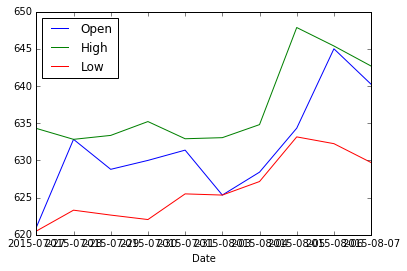

In [55]:
gool2 = gool[['Open', 'High', 'Low']]
gool2[:10].plot()

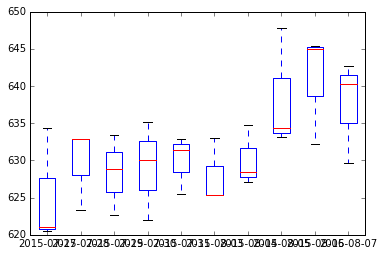

In [56]:
gool2[:10].T.plot.box()

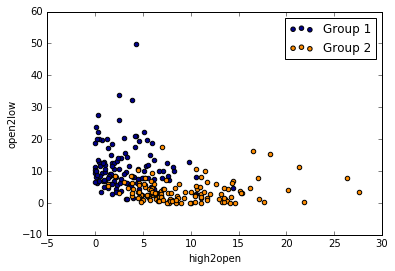

In [64]:
gool['high2open'] = gool.High - gool.Open
gool['open2low'] = gool.Open - gool.Low
gool['open2close'] = gool.Open - gool.Close
ax = gool[gool['open2close']>0].plot.scatter(x='high2open', y='open2low', color='DarkBlue', label='Group 1')
gool[gool['open2close']<=0].plot.scatter(x='high2open', y='open2low', color='DarkOrange', label='Group 2', ax=ax)
